### 1. 导入需要的库

In [1]:
import numpy as np#生成数据点
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


### 在这一步，我们的基本思路是，先创建一组随机的，分布在0~5上的横坐标轴的取值(x)，然后将这一组值放到sin函数中去生成纵坐标的值(y)，接着再到y上去添加噪声。全程我们会使用numpy库来为我们生成这个正弦曲线。


### 2. 创建一条含有噪声的正弦曲线


In [3]:
rng = np.random.RandomState(1)#随机种子

In [4]:
rng.rand(80,1)#因为sklearn输入只要2D，所以生成80行1列随机数0-1。

array([[4.17022005e-01],
       [7.20324493e-01],
       [1.14374817e-04],
       [3.02332573e-01],
       [1.46755891e-01],
       [9.23385948e-02],
       [1.86260211e-01],
       [3.45560727e-01],
       [3.96767474e-01],
       [5.38816734e-01],
       [4.19194514e-01],
       [6.85219500e-01],
       [2.04452250e-01],
       [8.78117436e-01],
       [2.73875932e-02],
       [6.70467510e-01],
       [4.17304802e-01],
       [5.58689828e-01],
       [1.40386939e-01],
       [1.98101489e-01],
       [8.00744569e-01],
       [9.68261576e-01],
       [3.13424178e-01],
       [6.92322616e-01],
       [8.76389152e-01],
       [8.94606664e-01],
       [8.50442114e-02],
       [3.90547832e-02],
       [1.69830420e-01],
       [8.78142503e-01],
       [9.83468338e-02],
       [4.21107625e-01],
       [9.57889530e-01],
       [5.33165285e-01],
       [6.91877114e-01],
       [3.15515631e-01],
       [6.86500928e-01],
       [8.34625672e-01],
       [1.82882773e-02],
       [7.50144315e-01],


In [7]:
X = np.sort(5 * rng.rand(80,1), axis=0)#将随机数排序sort

In [8]:
y = np.sin(X).ravel()#因为虽然输入是2D，但是输出的标签是一维矩阵，因此要用ravel来对X降维。

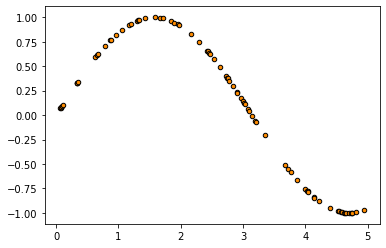

In [9]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")

### 增加噪音，y[::5] += 3 * (0.5 - rng.rand(16))中，y[::5]：切片作用，每5行每5列选取，(0.5 - rng.rand(16)）：随即生辰-0.5到0.5之间的16个数，扩大3倍！

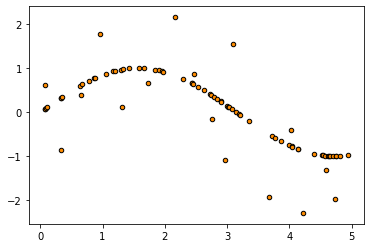

In [10]:
y[::5] += 3 * (0.5 - rng.rand(16))
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")

### 3. 实例化&训练模型


#### 这里做一个对比实验

In [20]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### 4. 测试集导入模型，预测结果


In [21]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
#X_test = np.arange(0.0, 5.0, 0.01).reshape(-1,1)
X_test
#作用就是升维，因为
#这里是测试集，最是要放入模型中的，而模型中一定是2D数据，所以要升维度
#类似于.reshape(-1,1)。

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.

### 这里说一下，[:, np.newaxis]功能

In [22]:
#1.建立一个一维数组
a = np.array([1,2,3,4])
a.shape

(4,)

In [23]:
#2.升维到2D (多行一列)
b = a[:,np.newaxis]
b.shape

(4, 1)

In [24]:
b = a[np.newaxis,:]#（一行多列）
b.shape

(1, 4)

In [25]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)


### 5. 绘制图像


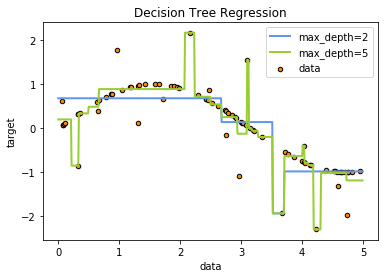

In [26]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
#s:代表点的大小
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### 深度为5，受噪音影响太大，因此过拟合！！！！